A linked list of length n is given such that each node contains an additional random pointer, which could point to any node in the list, or null.

Construct a deep copy of the list. The deep copy should consist of exactly n brand new nodes, where each new node has its value set to the value of its corresponding original node. Both the next and random pointer of the new nodes should point to new nodes in the copied list such that the pointers in the original list and copied list represent the same list state. None of the pointers in the new list should point to nodes in the original list.

For example, if there are two nodes X and Y in the original list, where X.random --> Y, then for the corresponding two nodes x and y in the copied list, x.random --> y.

Return the head of the copied linked list.

The linked list is represented in the input/output as a list of n nodes. Each node is represented as a pair of [val, random_index] where:

- val: an integer representing Node.val
- random_index: the index of the node (range from 0 to n-1) that the random pointer points to, or null if it does not point to any node.

Your code will only be given the head of the original linked list.

## Example 1:

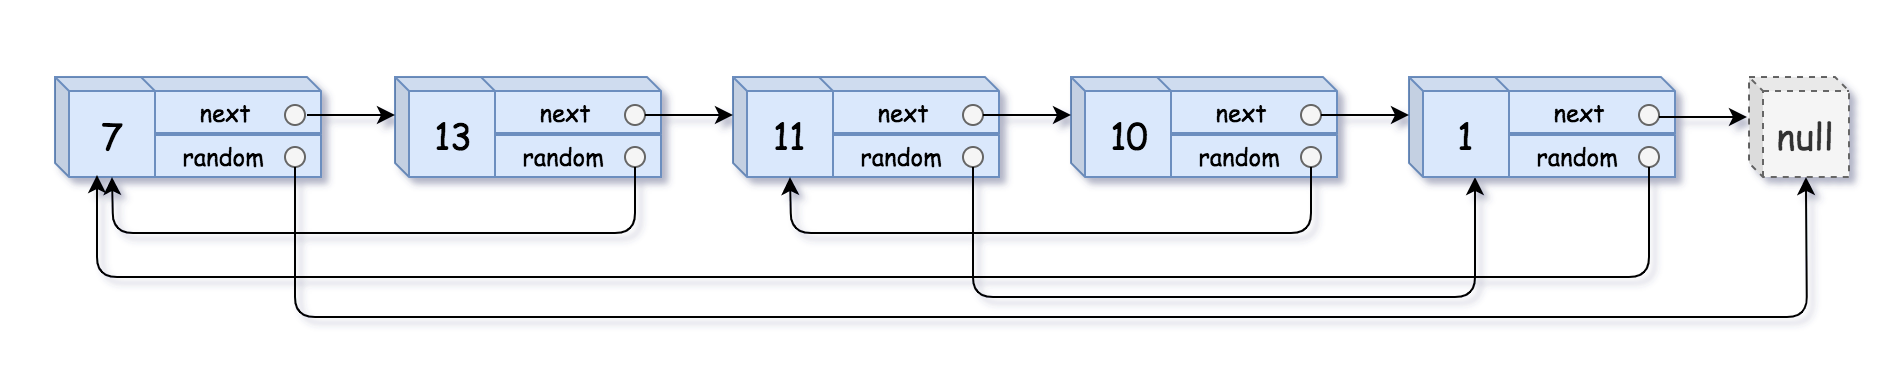

__Input__: head = [[7,null],[13,0],[11,4],[10,2],[1,0]]  
__Output__: [[7,null],[13,0],[11,4],[10,2],[1,0]]  


## Example 2:

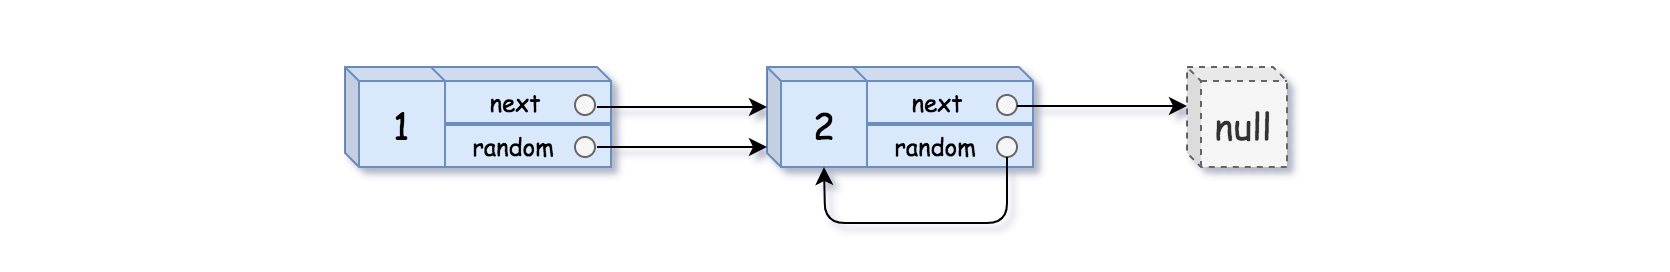

__Input__: head = [[1,1],[2,1]]  
__Output__: [[1,1],[2,1]]


## Example 3:

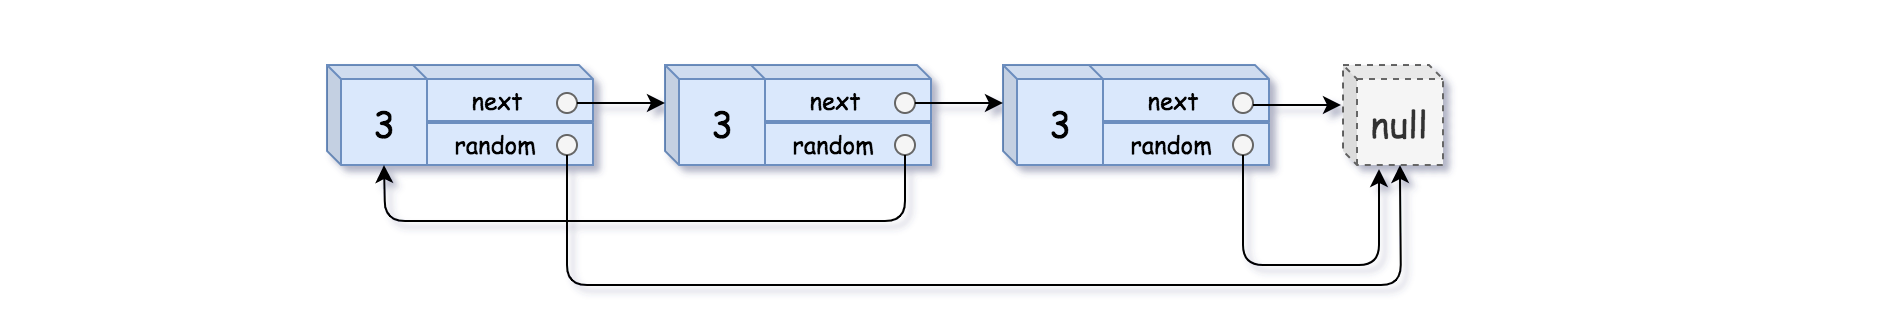

__Input__: head = [[3,null],[3,0],[3,null]]  
__Output__: [[3,null],[3,0],[3,null]]

In [1]:
class Solution(object):
    """
    :type head: Node
    :rtype: Node
    """
    def __init__(self):
        # Dictionary which holds old nodes as keys and new nodes as its values.
        self.visitedHash = {}

    def copyRandomList(self, head):

        if head == None:
            return None

        # If we have already processed the current node, then we simply return the cloned version of it.
        if head in self.visitedHash:
            return self.visitedHash[head]

        # create a new node
        # with the value same as old node.
        node = Node(head.val, None, None)

        # Save this value in the hash map. This is needed since there might be
        # loops during traversal due to randomness of random pointers and this would help us avoid them.
        self.visitedHash[head] = node

        # Recursively copy the remaining linked list starting once from the next pointer and then from the random pointer.
        # Thus we have two independent recursive calls.
        # Finally we update the next and random pointers for the new node created.
        node.next = self.copyRandomList(head.next)
        node.random = self.copyRandomList(head.random)

        return node

In [2]:
class Solution(object):
    def __init__(self):
        # Creating a visited dictionary to hold old node reference as "key" and new node reference as the "value"
        self.visited = {}

    def getClonedNode(self, node):
        # If node exists then
        if node:
            # Check if its in the visited dictionary          
            if node in self.visited:
                # If its in the visited dictionary then return the new node reference from the dictionary
                return self.visited[node]
            else:
                # Otherwise create a new node, save the reference in the visited dictionary and return it.
                self.visited[node] = Node(node.val, None, None)
                return self.visited[node]
        return None

    def copyRandomList(self, head):
        """
        :type head: Node
        :rtype: Node
        """

        if not head:
            return head

        old_node = head
        # Creating the new head node.       
        new_node = Node(old_node.val, None, None)
        self.visited[old_node] = new_node

        # Iterate on the linked list until all nodes are cloned.
        while old_node != None:

            # Get the clones of the nodes referenced by random and next pointers.
            new_node.random = self.getClonedNode(old_node.random)
            new_node.next = self.getClonedNode(old_node.next)

            # Move one step ahead in the linked list.
            old_node = old_node.next
            new_node = new_node.next

        return self.visited[head]

In [3]:
class Solution(object):
    def copyRandomList(self, head):
        """
        :type head: Node
        :rtype: Node
        """
        if not head:
            return head

        # Creating a new weaved list of original and copied nodes.
        ptr = head
        while ptr:

            # Cloned node
            new_node = Node(ptr.val, None, None)

            # Inserting the cloned node just next to the original node.
            # If A->B->C is the original linked list,
            # Linked list after weaving cloned nodes would be A->A'->B->B'->C->C'
            new_node.next = ptr.next
            ptr.next = new_node
            ptr = new_node.next

        ptr = head

        # Now link the random pointers of the new nodes created.
        # Iterate the newly created list and use the original nodes random pointers,
        # to assign references to random pointers for cloned nodes.
        while ptr:
            ptr.next.random = ptr.random.next if ptr.random else None
            ptr = ptr.next.next

        # Unweave the linked list to get back the original linked list and the cloned list.
        # i.e. A->A'->B->B'->C->C' would be broken to A->B->C and A'->B'->C'
        ptr_old_list = head # A->B->C
        ptr_new_list = head.next # A'->B'->C'
        head_new = head.next
        while ptr_old_list:
            ptr_old_list.next = ptr_old_list.next.next
            ptr_new_list.next = ptr_new_list.next.next if ptr_new_list.next else None
            ptr_old_list = ptr_old_list.next
            ptr_new_list = ptr_new_list.next
        return head_new